In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from yaml import safe_load

from gene_benchmark.encoder import PreComputedEncoder
from gene_benchmark.tasks import EntitiesTask


/opt/miniconda3/envs/tmpt/lib/python3.12/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


# installments
This notebook requires to install the umap-learn package via the conda tool. The plotting will require that the pandas matplotlib datashader bokeh holoviews scikit-image and colorcet to be installed

In [2]:
def load_gene_list(file_name):
    with open(file_name) as f:
        return safe_load(f)

In [3]:
encoding_base_folder = Path('/Users/yoavkt/Documents/encodings')
encodings = {'cocnat':encoding_base_folder / Path('concat.csv'),
             'geneformer':encoding_base_folder / Path('geneformer.csv'),
             'top_mteb':encoding_base_folder / Path('top_mteb.csv')}
encoders = {key: PreComputedEncoder(encoder_model_name=value) for key, value in encodings.items()}
tasks = ['N1 network','TF vs non-TF','Chromosome']
gene_list = load_gene_list(encoding_base_folder / Path('inclusion_genes.yaml'))
task_folder = '../tasks'

/opt/miniconda3/envs/tmpt/lib/python3.12/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


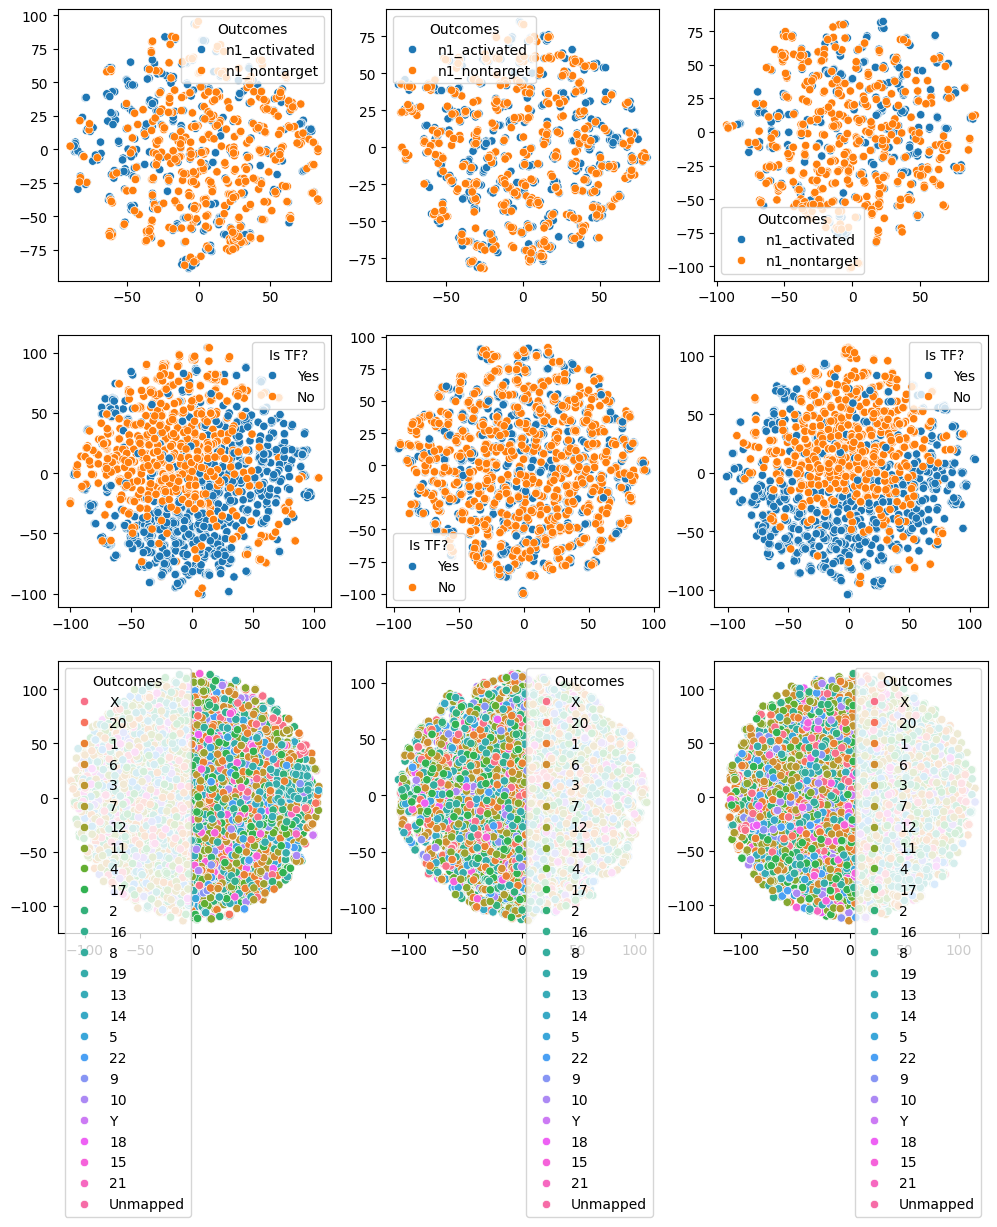

In [6]:
f,axarr =  plt.subplots(len(tasks),len(encodings),figsize=(len(encodings)*8, len(tasks)*8))
for task_name,ax_sub in zip(tasks,axarr):
    for model_name,ax in zip(encoders,ax_sub):
        ent_tsk = EntitiesTask(task=task_name,encoder=encoders[model_name],include_symbols=gene_list,tasks_folder=task_folder)
        outcomes, encodings = ent_tsk._prepare_datamat_and_labels()
        X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(encodings)
        sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1],ax=ax,hue=outcomes)